## 随机梯度下降

准备数据：

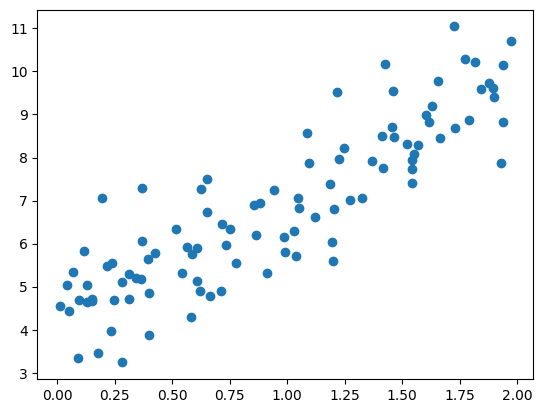

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)
m = 100  # 样本数m
X = 2 * np.random.rand(m, 1)  # 一维特征值X
y = 4 + 3 * X + np.random.randn(m, 1)  # 预测结果y
X_b = add_dummy_feature(X)  # 给特征值添加x0维度

# 准备两个测试样本: x_new_b
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

fig, ax = plt.subplots()
ax.scatter(X, y)

随机梯度下降(SGD)每次迭代的公式如下，不同于批量梯度下降，不需要除以 $m$：

$$\bigtriangledown_{\theta} MSE(\theta) = 2X^T \cdot (X \cdot \theta - y)$$

$$ \theta^{(next step)} = \theta - \eta \bigtriangledown_{\theta} MSE(\theta)$$

theta=[[4.21076011]
 [2.74856079]]


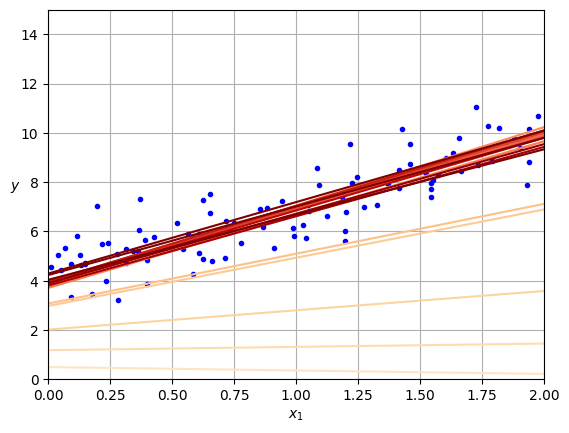

In [26]:
# 决定每次迭代的学习的函数，逐渐降低学习率
def learning_schedule(t):
    # 随机梯度下降的超参数，用于控制学习率
    t0, t1 = 5, 50
    return t0 / (t + t1)

# 画出每次迭代后的拟合直线
def plot_gradient_descent(theta):
    theta_path_sgd = []  # extra code – we need to store the path of theta in the
    n_shown = 20
    n_epochs = 50
    for epoch in range(n_epochs):
        for iteration in range(m):
            # extra code – these 4 lines are used to generate the figure
            if epoch == 0 and iteration < n_shown:
                y_predict = X_new_b @ theta
                color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
                plt.plot(X_new, y_predict, color=color)

            random_index = np.random.randint(m)
            xi = X_b[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]
            gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
            eta = learning_schedule(epoch * m + iteration)
            theta = theta - eta * gradients
            theta_path_sgd.append(theta)  # extra code – to generate the figure

    return theta_path_sgd

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

np.random.seed(42)
# 初始参数theta，通过每次迭代进行修正
theta = np.random.randn(2, 1)
theta_path = plot_gradient_descent(theta)
print(f'theta={theta_path[-1]}')

### 基于sklearn的随机梯度下降

`Scikit-Learn`提高了`SGDRegressor`，可完成线性回归的随机梯度下降。

In [28]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
# y.shape: (100,1), y.ravel().shape: (100,)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.19984658] [2.73198364]
